In [13]:

!pip install wordcloud nltk


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
# Step 1: Load the CSV file
df = pd.read_csv('twitter_training.csv' ) 
print("# Data Loaded Successfully!\n")

# Data Loaded Successfully!



In [19]:
print(" Preview of Dataset:")
print(df.head(11))

 Preview of Dataset:
    2401  Borderlands  Positive  \
0   2401  Borderlands  Positive   
1   2401  Borderlands  Positive   
2   2401  Borderlands  Positive   
3   2401  Borderlands  Positive   
4   2401  Borderlands  Positive   
5   2402  Borderlands  Positive   
6   2402  Borderlands  Positive   
7   2402  Borderlands  Positive   
8   2402  Borderlands  Positive   
9   2402  Borderlands  Positive   
10  2402  Borderlands  Positive   

   im getting on borderlands and i will murder you all ,  
0   I am coming to the borders and I will kill you...     
1   im getting on borderlands and i will kill you ...     
2   im coming on borderlands and i will murder you...     
3   im getting on borderlands 2 and i will murder ...     
4   im getting into borderlands and i can murder y...     
5   So I spent a few hours making something for fu...     
6   So I spent a couple of hours doing something f...     
7   So I spent a few hours doing something for fun...     
8   So I spent a few hours 

In [20]:


# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Step 1: Load Data
df = pd.read_csv("twitter_training.csv", encoding='utf-8')  


df.columns = ['ID', 'Game', 'Sentiment', 'Text']

# Step 2: Clean Text Data
def clean_text(text):
    text = str(text).lower()                         
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  
    text = re.sub(r'\@w+|\#','', text)               
    text = re.sub(r'[^A-Za-z\s]', '', text)          
    text = ' '.join([word for word in text.split() if word not in stop_words])  
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Neeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


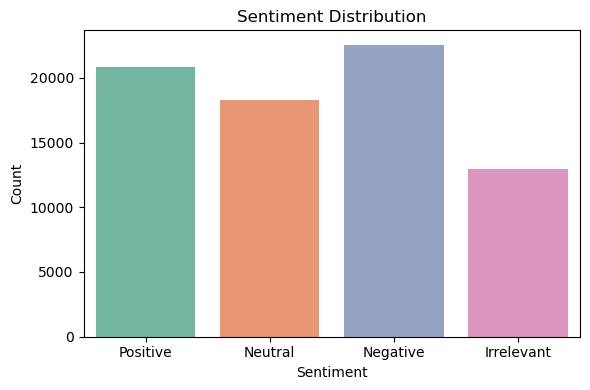

In [21]:
# Step 3: Sentiment Distribution Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




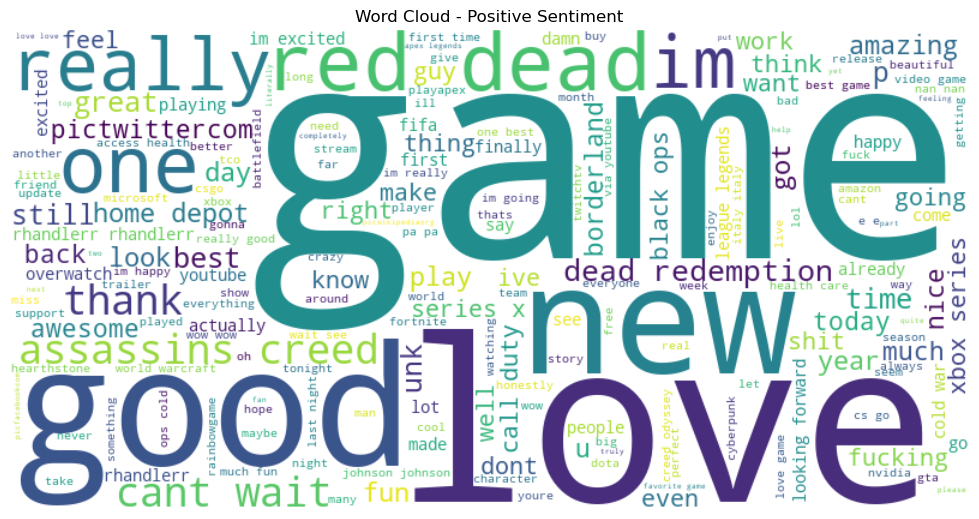

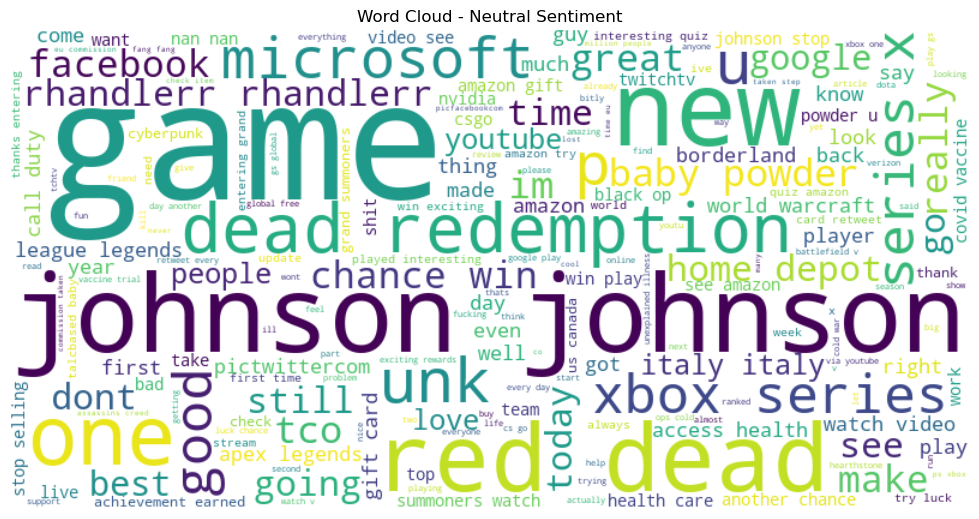

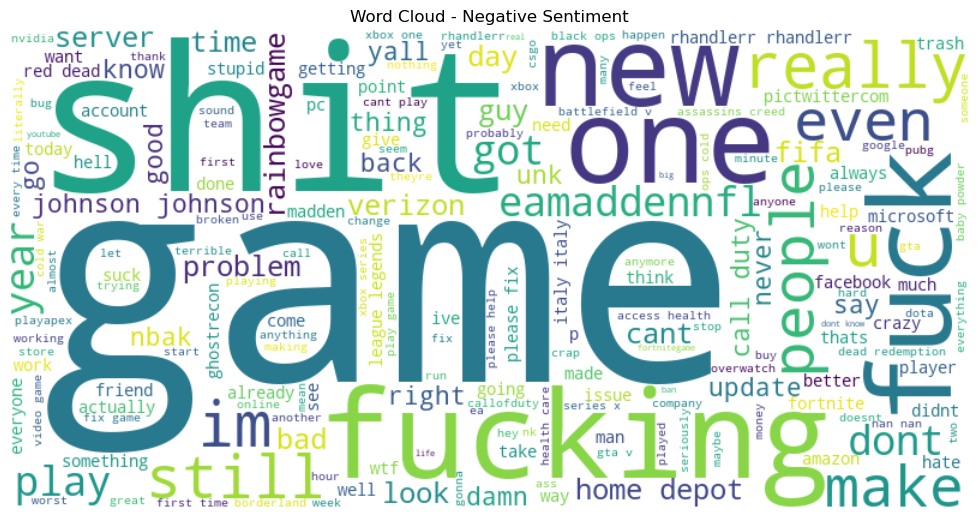

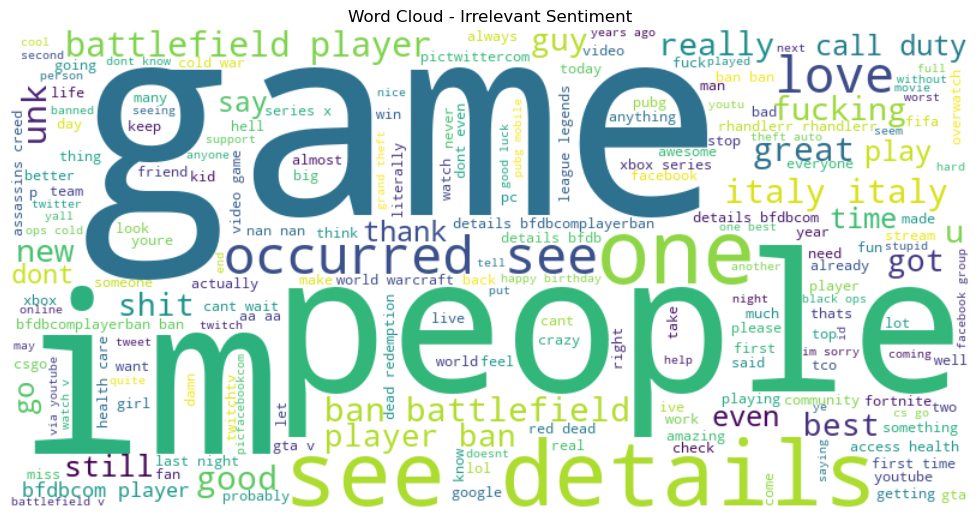

In [22]:
# Step 4: Word Cloud per Sentiment
for sentiment in df['Sentiment'].unique():
    text = ' '.join(df[df['Sentiment'] == sentiment]['Cleaned_Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud - {sentiment} Sentiment")
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()